<a href="https://colab.research.google.com/github/Souleymaneawe/Souleymaneawe/blob/main/Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import folium
from folium import Choropleth,Circle,Marker



In [ ]:
data = pd.read_csv("Murders.csv")

In [ ]:
data.head()

,Unnamed: 0,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,384897,384898,SC02100,Florence,Sheriff,Florence,South Carolina,1998,January,1,...,Unknown,Male,33,White,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,580401,580402,AZ01003,Tucson,Municipal Police,Pima,Arizona,2011,November,1,...,Not Hispanic,Male,21,Native American/Alaska Native,Not Hispanic,Family,Shotgun,0,0,FBI
2,236203,236204,OHCLP00,Cleveland,Municipal Police,Cuyahoga,Ohio,1991,July,12,...,Unknown,Male,48,White,Unknown,Acquaintance,Knife,0,0,FBI
3,440437,440438,MA01301,Boston,Municipal Police,Suffolk,Massachusetts,2002,January,5,...,Unknown,Male,46,White,Unknown,Wife,Strangulation,0,0,FBI
4,276041,276042,IN04600,La Porte,Sheriff,La Porte,Indiana,1993,January,1,...,Unknown,Male,26,White,Unknown,Acquaintance,Shotgun,0,0,FBI


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             10000 non-null  int64 
 1   Record ID              10000 non-null  int64 
 2   Agency Code            10000 non-null  object
 3   Agency Name            10000 non-null  object
 4   Agency Type            10000 non-null  object
 5   City                   10000 non-null  object
 6   State                  10000 non-null  object
 7   Year                   10000 non-null  int64 
 8   Month                  10000 non-null  object
 9   Incident               10000 non-null  int64 
 10  Crime Type             10000 non-null  object
 11  Crime Solved           10000 non-null  object
 12  Victim Sex             10000 non-null  object
 13  Victim Age             10000 non-null  int64 
 14  Victim Race            10000 non-null  object
 15  Victim Ethnicity    

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Record ID,0
Agency Code,0
Agency Name,0
Agency Type,0
City,0
State,0
Year,0
Month,0
Incident,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.replace({"Unknown":np.nan})

,Unnamed: 0,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,384897,384898,SC02100,Florence,Sheriff,Florence,South Carolina,1998,January,1,...,NaN,Male,33,White,NaN,Acquaintance,Blunt Object,0,0,FBI
1,580401,580402,AZ01003,Tucson,Municipal Police,Pima,Arizona,2011,November,1,...,Not Hispanic,Male,21,Native American/Alaska Native,Not Hispanic,Family,Shotgun,0,0,FBI
2,236203,236204,OHCLP00,Cleveland,Municipal Police,Cuyahoga,Ohio,1991,July,12,...,NaN,Male,48,White,NaN,Acquaintance,Knife,0,0,FBI
3,440437,440438,MA01301,Boston,Municipal Police,Suffolk,Massachusetts,2002,January,5,...,NaN,Male,46,White,NaN,Wife,Strangulation,0,0,FBI
4,276041,276042,IN04600,La Porte,Sheriff,La Porte,Indiana,1993,January,1,...,NaN,Male,26,White,NaN,Acquaintance,Shotgun,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,251135,251136,ILCPD00,Chicago,Municipal Police,Cook,Illinois,1992,March,48,...,NaN,NaN,0,NaN,NaN,NaN,Handgun,0,0,FBI
9996,360652,360653,ILCPD00,Chicago,Municipal Police,Cook,Illinois,1997,August,14,...,NaN,NaN,0,NaN,NaN,NaN,Handgun,0,0,FBI
9997,80187,80188,PAPEP00,Philadelphia,Municipal Police,Philadelphia,Pennsylvania,1983,June,11,...,Not Hispanic,Female,39,Black,Not Hispanic,Husband,Knife,0,0,FBI
9998,273932,273933,FL05900,Seminole,Sheriff,Seminole,Florida,1993,February,1,...,NaN,Male,38,White,NaN,Wife,Handgun,0,0,FBI


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Record ID,0
Agency Code,0
Agency Name,0
Agency Type,0
City,0
State,0
Year,0
Month,0
Incident,0


In [ ]:
data.columns

Index(['Unnamed: 0', 'Record ID', 'Agency Code', 'Agency Name', 'Agency Type',
       'City', 'State', 'Year', 'Month', 'Incident', 'Crime Type',
       'Crime Solved', 'Victim Sex', 'Victim Age', 'Victim Race',
       'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Age',
       'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship', 'Weapon',
       'Victim Count', 'Perpetrator Count', 'Record Source'],
      dtype='object')

In [ ]:
#data.drop(['Unnamed: 0','Record ID','Agency Code','Agency Name','Agency Type','Crime Solved','Record Source'],axis=1,inplace=True)

In [ ]:
le = LabelEncoder()
data1 = data.apply(lambda col: le.fit_transform(col.astype(str)))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             10000 non-null  int64 
 1   Record ID              10000 non-null  int64 
 2   Agency Code            10000 non-null  object
 3   Agency Name            10000 non-null  object
 4   Agency Type            10000 non-null  object
 5   City                   10000 non-null  object
 6   State                  10000 non-null  object
 7   Year                   10000 non-null  int64 
 8   Month                  10000 non-null  object
 9   Incident               10000 non-null  int64 
 10  Crime Type             10000 non-null  object
 11  Crime Solved           10000 non-null  object
 12  Victim Sex             10000 non-null  object
 13  Victim Age             10000 non-null  int64 
 14  Victim Race            10000 non-null  object
 15  Victim Ethnicity    

In [ ]:
correlation = data1.corr()

<Axes: >

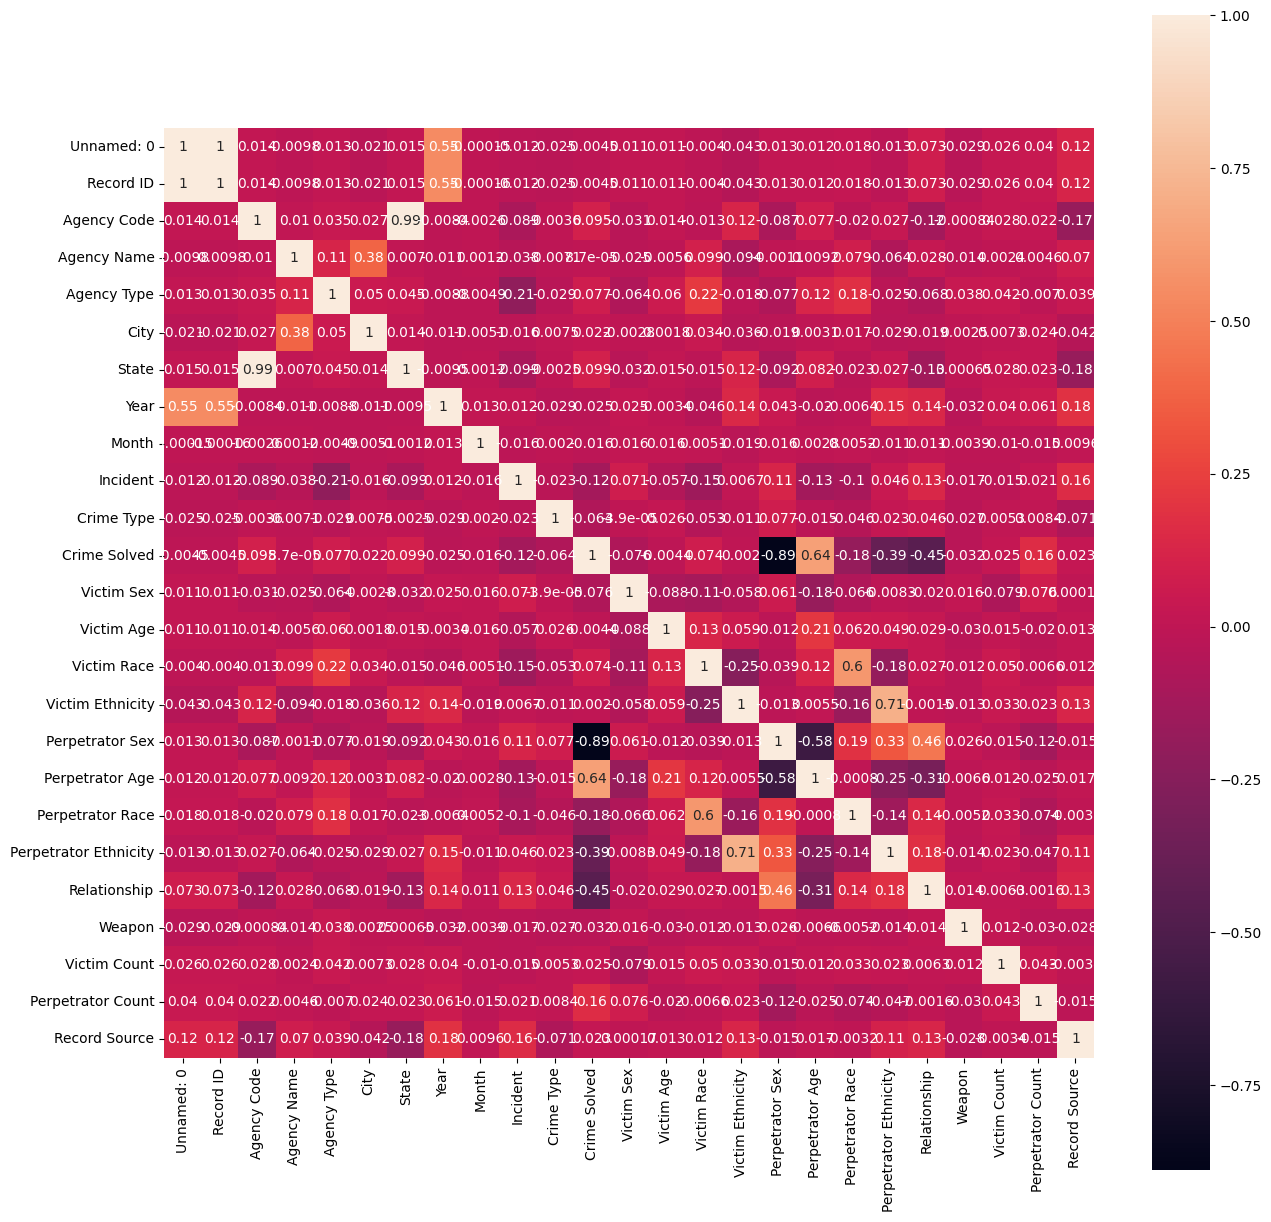

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(correlation, square = True, annot=True)

<Axes: xlabel='Victim Race'>

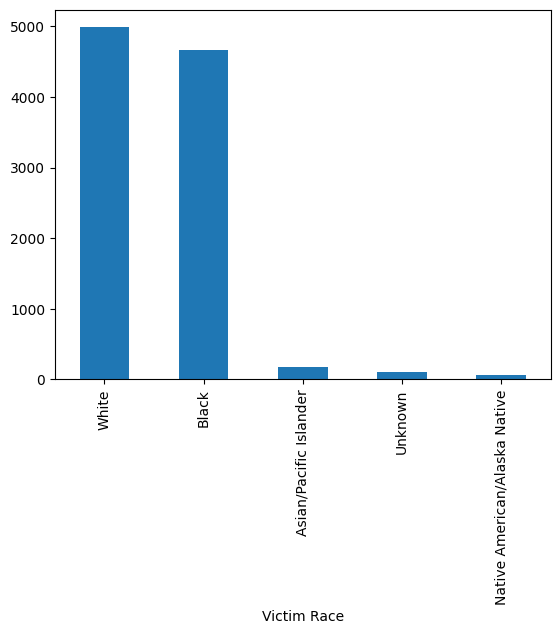

In [ ]:
data['Victim Race'].value_counts().plot.bar()

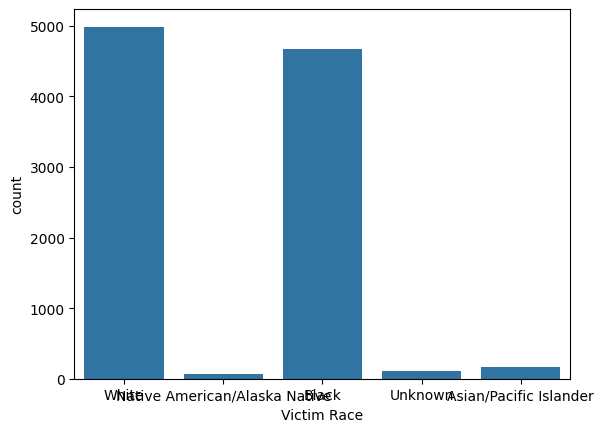

In [ ]:
sns.countplot(x='Victim Race',data=data)
plt.show()


In [ ]:
race = data['Victim Race'].value_counts()
fig = px.bar(y=race,x=race.index,title='Victim Race')
fig.show()


In [ ]:
race = data['Perpetrator Race'].value_counts()
fig=px.bar(y=race,x=race.index)
fig.show()

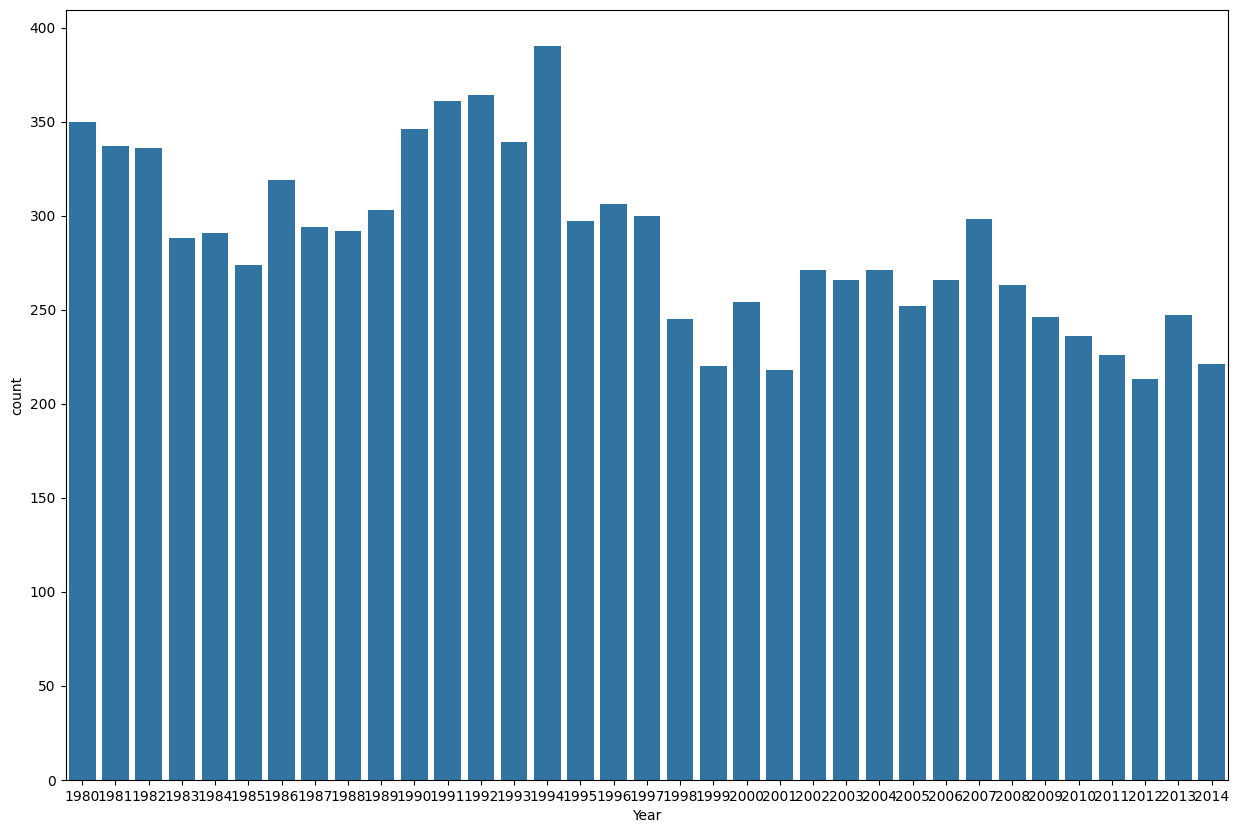

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Year', data=data)
plt.show()

In [ ]:
Year = data['Year'].value_counts()
fig=px.bar(y=Year,x=Year.index)
fig.show()

<ipython-input-20-cd39e0b988bc>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Year', ylabel='Density'>

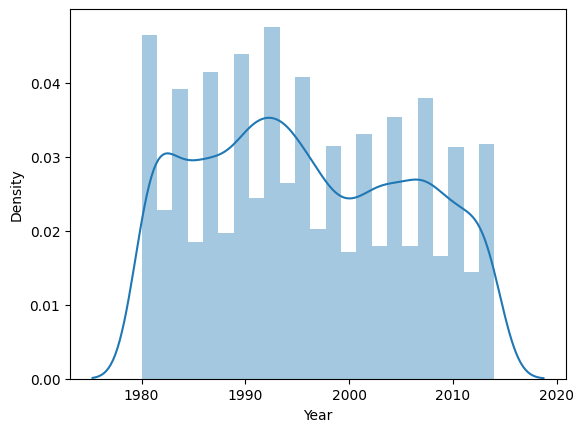

In [ ]:
sns.distplot(data['Year'])

In [ ]:
age = data['Perpetrator Age'].value_counts()
fig=px.bar(y=age,x=age.index)
fig.show()

<ipython-input-22-a7792d666805>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Perpetrator Age', ylabel='Density'>

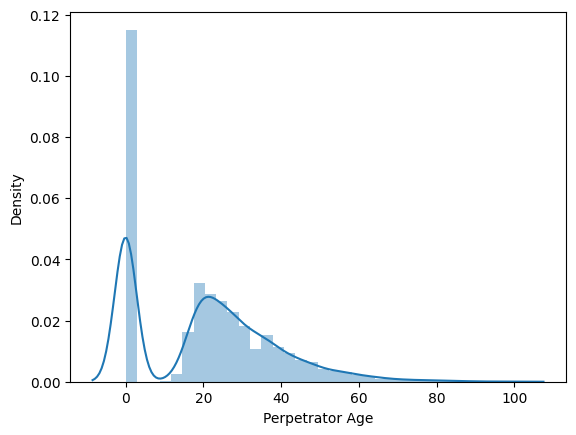

In [ ]:
sns.distplot(data['Perpetrator Age'])

In [ ]:
agev = data['Victim Age'].value_counts()
fig=px.bar(y=agev,x=agev.index)
fig.show()

<ipython-input-24-6cb212dc536e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Victim Age', ylabel='Density'>

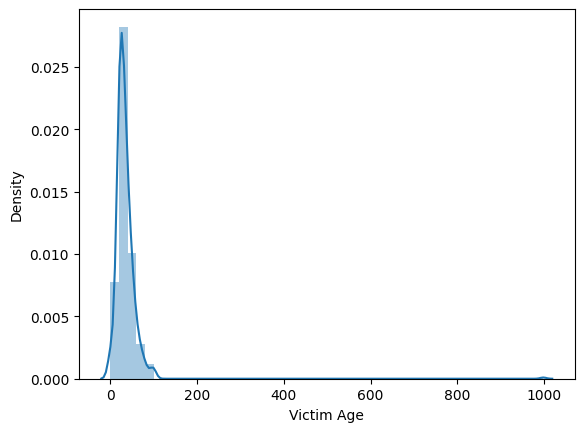

In [ ]:
sns.distplot(data['Victim Age'])

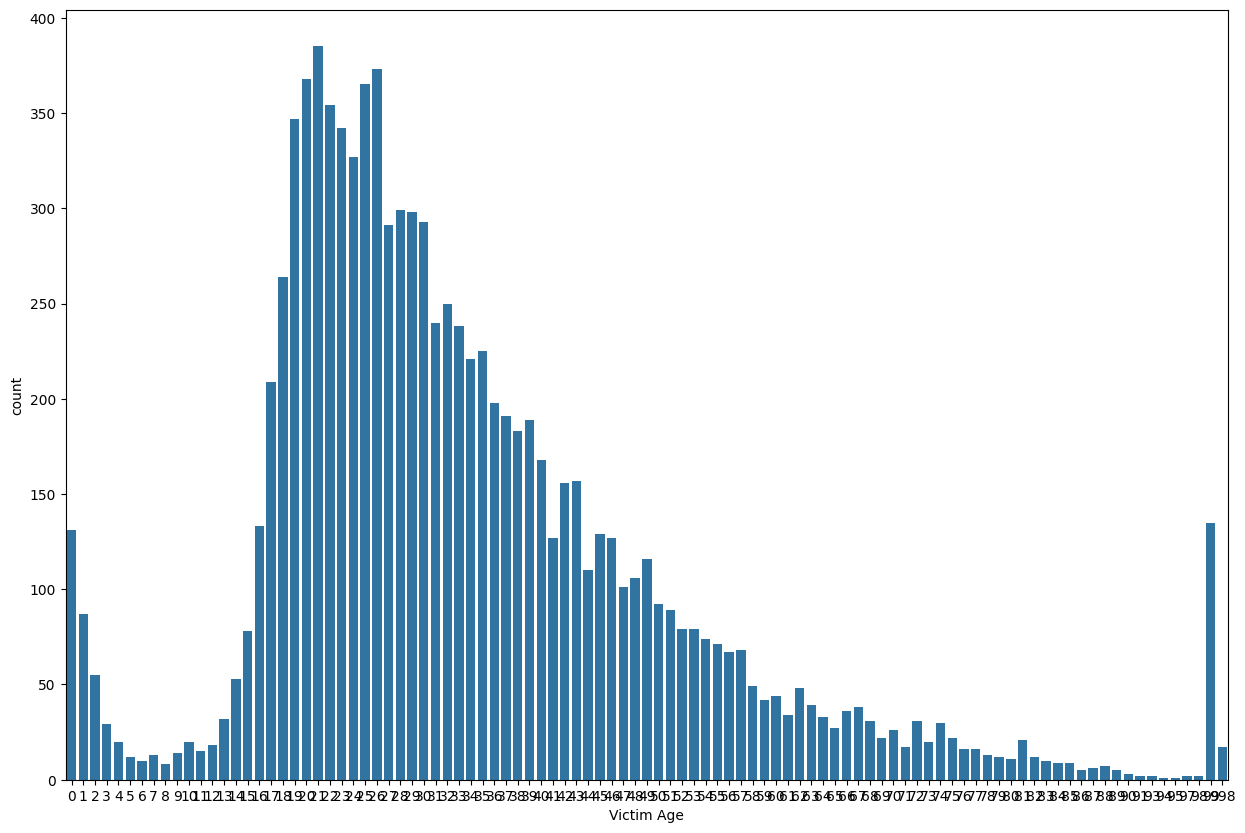

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Victim Age', data=data)
plt.show()

In [ ]:
crime=pd.read_csv('CrimeChicago.csv')
crime.head()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,61410,I182005190,3115,Investigate Person,INVESTIGATE PERSON,B3,465,NaN,2018-01-20 11:05:00,2018,1,Saturday,11,Part Three,JOHNSTON RD,42.287505,-71.092121,"(42.28750526, -71.09212143)"
1,230693,I162038129,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",B2,288,NaN,2016-05-16 11:24:00,2016,5,Monday,11,Part Two,MALCOLM X BLVD,42.329551,-71.085980,"(42.32955100, -71.08598000)"
2,191265,I162080532,3301,Verbal Disputes,VERBAL DISPUTE,A7,30,NaN,2016-10-02 00:07:00,2016,10,Sunday,0,Part Three,MAVERICK ST,42.369130,-71.036595,"(42.36912985, -71.03659529)"
3,205643,I162064987,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,NaN,,NaN,2016-08-12 17:46:00,2016,8,Friday,17,Part Two,NaN,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
4,185376,I162086815,3410,Towed,TOWED MOTOR VEHICLE,B3,456,NaN,2016-10-23 09:24:00,2016,10,Sunday,9,Part Three,GREENWOOD ST,42.301759,-71.079552,"(42.30175909, -71.07955160)"


In [ ]:
crime.dropna(subset=['Lat','Long','DISTRICT'],inplace=True)

In [ ]:
voler=crime[((crime.OFFENSE_CODE_GROUP=='Robbery'))]


In [ ]:
m=folium.Map(location=[42.329551,-71.0589],zoom_start=13)
m

In [ ]:
import folium
from folium import Choropleth,Circle,Marker


In [ ]:
m=folium.Map(location=[42.329551,-71.0589],zoom_start=13)
for idx, row in voler.iterrows():
Marker= (row['Lat'],row['Long']).add_to(m)
m

IndentationError: expected an indented block after 'for' statement on line 2 (<ipython-input-16-ebe51e77d2d5>, line 3)

In [ ]:
m=folium.Map(location=[42.329551,-71.0589],zoom_start=13)
for idx, row in voler.iterrows():
    # Indent this line to be part of the for loop
    Marker = folium.Marker((row['Lat'],row['Long']))
    Marker.add_to(m)
m